In [1]:
import tensorflow as tf

2023-10-19 15:37:38.455456: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-19 15:37:38.486625: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 15:37:38.486644: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 15:37:38.486656: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 15:37:38.493944: I tensorflow/core/platform/cpu_feature_g

In [2]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5722348852918988976
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5510283264
locality {
  bus_id: 1
  links {
  }
}
incarnation: 162493173251049487
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2023-10-19 15:37:39.816128: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:37:39.826097: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:37:39.826121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:37:40.438031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:37:40.438058: I tensorflow/compile

In [6]:
os.chdir("/mnt/")

NameError: name 'os' is not defined

In [7]:
!git clone https://github.com/Annaantonin/Data.git

fatal: destination path 'Data' already exists and is not an empty directory.


In [8]:
import Data as data

In [3]:
!git clone https://github.com/Crunch-UQ4MI/neuraluq.git
#!git clone https://github.com/Annaantonin/Data.git
!pip install tensorflow-probability
!pip install scipy
import os
os.chdir("/tf/neuraluq/")
!python setup.py install

fatal: destination path 'neuraluq' already exists and is not an empty directory.

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:314: InformationOnly: Normalizing 'v0.1.0-beta' to '0.1.0b0'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************

In [10]:
os.listdir(".")

['dataset',
 'README.md',
 'dist',
 'build',
 'examples',
 'NeuralUQ.egg-info',
 '.git',
 'setup.py',
 'Data',
 'neuraluq']

In [4]:
import neuraluq as neuq
import neuraluq.variables as neuq_vars
from neuraluq.config import tf

import numpy as np
import scipy.io as sio
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 16:14:30 2023

@author: Antonina
"""

#%%
# Simulated SDOF with:
#K_tue=5;
# C_true=0.2236; %system damping ratio 5%
# m=1; %mass for sdof example

def load_data(noise_x, noise_f):

    #data = sio.loadmat(r"G:\My Drive\Python_codes\NNs\sdof_ymeas.mat")
    data = sio.loadmat("Data/sdof_ymeas.mat")
    #  t_x_train, t_f_train = data["t"], data["ymeas"]
    # data = matdata['data']
    
    x_tt_train, t_train = data["a"], data["t"]
    x_train, f_train = data["u"], data["force"]
    # train_x_tt = t_x_tt_train, x_train
    # train_f = t_f_train, f_train

    return  x_tt_train.T, t_train.T, x_train.T, f_train.T

#m=1
# [0][..., 0:1]     

def pde_fn(t, x, log_c, log_k):
    # log_k=tf.clip(np.log(3),np.log(20)) # to make constrains for the parameters
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                            
    x_tt = tf.gradients(x_t, t)

    f = tf.multiply(x_tt, 5.0)+ tf.exp(log_c) * x_t + tf.exp(log_k) * x

    # return [f,x_tt]
    return f

def pde_xtt(t,x):
    x_t = tf.gradients(x, t)                                                                                                                                                                                                                        
    x_tt = tf.gradients(x_t, t)
    
    return x_tt
    

@neuq.utils.timer
def Trainable(
    x_tt_train, t_train, x_train, f_train, noise, layers, 
):
    # build processes
    
    process_x = neuq.process.Process(
        surrogate=neuq.surrogates.FNN(layers=layers, activation=tf.tanh),
        # surrogate=neuq.surrogates.FNN(layers=layers,activation=RELu),
        posterior=neuq_vars.fnn.Trainable(layers=layers),# displacement
    )
    process_log_c = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=0),
    )
    process_log_k = neuq.process.Process(
        surrogate=neuq.surrogates.Identity(),
        posterior=neuq_vars.const.Trainable(value=2),
    )
    method = neuq.inferences.DEns(
        num_samples=10, num_iterations=10000, optimizer=tf.train.AdamOptimizer(1e-3),
    )

    # build losses
    loss_x = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=x_train, # could be the problem
        processes=[process_x],
        pde=pde_xtt, # dotdot _X
        multiplier=1.0,
    )
    
    loss_f = neuq.likelihoods.MSE(
        inputs=t_train,
        targets=f_train, # f_train  CHANGE!!!!
        processes=[process_x, process_log_c, process_log_k], # tf train
        pde=pde_fn,
        multiplier=1.0,
    )
    # build model
    model = neuq.models.Model(
        processes=[process_x, process_log_c, process_log_k],
        likelihoods=[loss_x, loss_f],
    )
    # assign and compile method
    model.compile(method)
    # obtain posterior samples
    samples = model.run()

    processes = [process_x, process_log_c, process_log_k]
    return processes, samples, model


if __name__ == "__main__":

    noise = 0

    x_tt_train, t_train, x_train, f_train = load_data(noise, noise)

    # t_x_tt_train, x_tt_train = train_x_tt
    # t_f_train, f_train = train_f

    layers = [1, 100, 100, 1]

    processes, samples, model = Trainable(
        x_tt_train, t_train, x_train, f_train, noise, layers,
    )

    x_pred, logc_pred, logk_pred = model.predict(t_train, samples, processes, pde_fn=None)
	# samples = [[NN_weights/c/k] for comb in range(20)]

    # then plot samples of c and k
    # processes, samples, model = Samplable(
    #    x_tt_train, t_train, noise, layers,
    # )
	
    # A=model.predict(samples, processes[0]) # for each t it will give 20 predictions for combinations of NN_weights/c/k
#fsamp=samples[5]    
# Csamp=samples[6]
# Ksamp=samples[7]
# f_post=u_pred[0,:,:]
# C_post=np.exp(np.mean(Csamp))
# K_post=np.exp(np.mean(Ksamp))
    
# plt.plot(Csamp)
# plt.figure
# plt.hist(np.exp(Csamp))
# plt.plot(Ksamp)
# u_pred, logk_1_pred, logk_2_pred = model.predict(x_tt_train, samples, processes, pde_fn=None)
#         # np.concatenate([x_tt_train, t_train], axis=-1)
# plt.plot(t_train.T,f_post.T)
# plt.xlabel('time(s)')
# plt.title('Predicted (accelerations)')
# plt.figure()
# plt.plot(t_train.T,x_tt_train.T)
# plt.xlabel('time(s)')
# plt.title('Training data data (accelerations)')        
# print(C_post)   
# print(K_post)     
        

2023-10-19 15:47:20.749927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:47:20.749988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:47:20.749999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:47:20.750361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-19 15:47:20.750391: I tensorflow/core/co

Supporting backend tensorflow.compat.v1

Compiling a Ensemble method

Generating 0th sample by deep ensemble...


2023-10-19 15:47:20.964890: W tensorflow/c/c_api.cc:305] Operation '{name:'Variable_23/Assign' id:1776 op device:{requested: '', assigned: ''} def:{{{node Variable_23/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](Variable_23, Const_17)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  0 , loss:  781.51965
Iteration:  1000 , loss:  561.7341
Iteration:  2000 , loss:  294.57306
Iteration:  3000 , loss:  135.63344
Iteration:  4000 , loss:  104.77846
Iteration:  5000 , loss:  71.97194
Iteration:  6000 , loss:  66.86183
Iteration:  7000 , loss:  38.53071
Iteration:  8000 , loss:  36.534267
Iteration:  9000 , loss:  36.00144
Generating 1th sample by deep ensemble...
Iteration:  0 , loss:  786.95557


2023-10-19 15:48:52.770696: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  518.1379
Iteration:  2000 , loss:  376.97086
Iteration:  3000 , loss:  235.25558
Iteration:  4000 , loss:  219.68616
Iteration:  5000 , loss:  187.25748
Iteration:  6000 , loss:  70.79355
Iteration:  7000 , loss:  40.84766
Iteration:  8000 , loss:  36.98106
Iteration:  9000 , loss:  36.65965
Generating 2th sample by deep ensemble...
Iteration:  0 , loss:  783.224


2023-10-19 15:50:23.714875: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  340.65393
Iteration:  2000 , loss:  169.67354
Iteration:  3000 , loss:  95.032196
Iteration:  4000 , loss:  92.710014
Iteration:  5000 , loss:  52.631264
Iteration:  6000 , loss:  37.449455
Iteration:  7000 , loss:  36.267326
Iteration:  8000 , loss:  35.883423
Iteration:  9000 , loss:  35.569336
Generating 3th sample by deep ensemble...
Iteration:  0 , loss:  795.6999


2023-10-19 15:51:54.437262: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  607.8601
Iteration:  2000 , loss:  219.91124
Iteration:  3000 , loss:  54.572678
Iteration:  4000 , loss:  37.121468
Iteration:  5000 , loss:  36.248016
Iteration:  6000 , loss:  35.85605
Iteration:  7000 , loss:  35.608784
Iteration:  8000 , loss:  35.342274
Iteration:  9000 , loss:  35.932686
Generating 4th sample by deep ensemble...
Iteration:  0 , loss:  783.9691


2023-10-19 15:53:24.967624: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  494.10284
Iteration:  2000 , loss:  298.196
Iteration:  3000 , loss:  148.29967
Iteration:  4000 , loss:  104.600174
Iteration:  5000 , loss:  89.393936
Iteration:  6000 , loss:  55.85048
Iteration:  7000 , loss:  37.771164
Iteration:  8000 , loss:  36.384247
Iteration:  9000 , loss:  35.946644
Generating 5th sample by deep ensemble...
Iteration:  0 , loss:  780.0341


2023-10-19 15:54:55.701321: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  528.62646
Iteration:  2000 , loss:  314.518
Iteration:  3000 , loss:  109.976395
Iteration:  4000 , loss:  94.18814
Iteration:  5000 , loss:  58.037125
Iteration:  6000 , loss:  41.28757
Iteration:  7000 , loss:  36.988518
Iteration:  8000 , loss:  36.157192
Iteration:  9000 , loss:  35.82734
Generating 6th sample by deep ensemble...
Iteration:  0 , loss:  778.7363


2023-10-19 15:56:27.190431: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  457.22894
Iteration:  2000 , loss:  43.156956
Iteration:  3000 , loss:  36.677097
Iteration:  4000 , loss:  36.175037
Iteration:  5000 , loss:  35.801495
Iteration:  6000 , loss:  35.518326
Iteration:  7000 , loss:  35.33347
Iteration:  8000 , loss:  35.211346
Iteration:  9000 , loss:  35.167522
Generating 7th sample by deep ensemble...
Iteration:  0 , loss:  784.1689


2023-10-19 15:57:58.641333: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  505.2459
Iteration:  2000 , loss:  206.21048
Iteration:  3000 , loss:  105.89302
Iteration:  4000 , loss:  98.598045
Iteration:  5000 , loss:  83.981514
Iteration:  6000 , loss:  71.69616
Iteration:  7000 , loss:  57.1583
Iteration:  8000 , loss:  38.515816
Iteration:  9000 , loss:  36.349323
Generating 8th sample by deep ensemble...
Iteration:  0 , loss:  785.29065


2023-10-19 15:59:30.341390: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  499.2227
Iteration:  2000 , loss:  264.14658
Iteration:  3000 , loss:  179.22133
Iteration:  4000 , loss:  99.78722
Iteration:  5000 , loss:  68.70619
Iteration:  6000 , loss:  63.50128
Iteration:  7000 , loss:  38.51806
Iteration:  8000 , loss:  36.524406
Iteration:  9000 , loss:  35.986656
Generating 9th sample by deep ensemble...
Iteration:  0 , loss:  791.55493


2023-10-19 16:01:01.565633: W tensorflow/c/c_api.cc:305] Operation '{name:'beta2_power_2/Assign' id:2447 op device:{requested: '', assigned: ''} def:{{{node beta2_power_2/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](beta2_power_2, beta2_power_2/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Iteration:  1000 , loss:  609.3677
Iteration:  2000 , loss:  139.07358
Iteration:  3000 , loss:  49.69973
Iteration:  4000 , loss:  39.584835
Iteration:  5000 , loss:  37.517647
Iteration:  6000 , loss:  36.557384
Iteration:  7000 , loss:  36.016285
Iteration:  8000 , loss:  35.740032
Iteration:  9000 , loss:  35.47911
Execution time for 'Trainable' function is: 911.789 s, 15.196 mins


In [ ]:
[a.shape for a in samples]

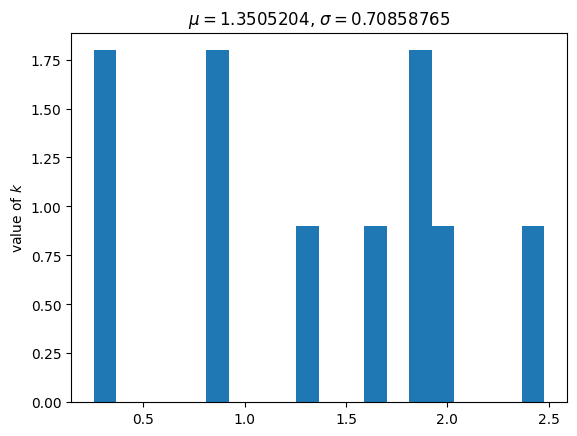

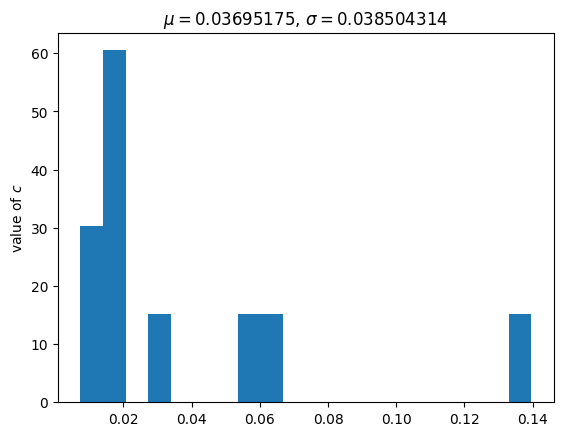

In [9]:
neuq.utils.hist(np.exp(logk_pred).flatten(), name="value of $k$")
neuq.utils.hist(np.exp(logc_pred).flatten(), name="value of $c$")

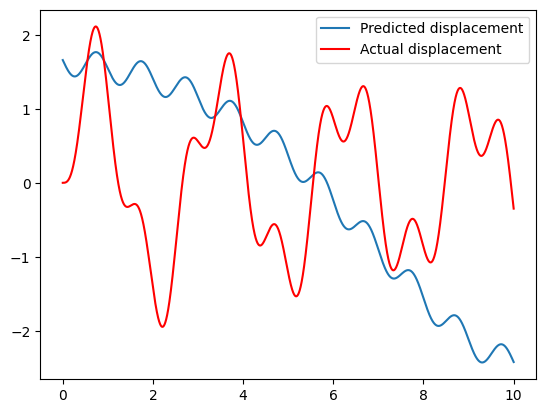

In [10]:
plt.plot(t_train,np.mean(x_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train,'r',label='Actual displacement')
plt.legend()

In [11]:
Csamp=samples[6]    
Ksamp=samples[7]
C_post=np.exp(np.mean(Csamp))
print("C_true=0.22(Ns/m) and C_post =", C_post) 
K_post=np.exp(np.mean(Ksamp))
print("K_true=10(N/m) and K_post =", K_post) 


C_true=0.22(Ns/m) and C_post = 0.024605399
K_true=10(N/m) and K_post = 1.0935041


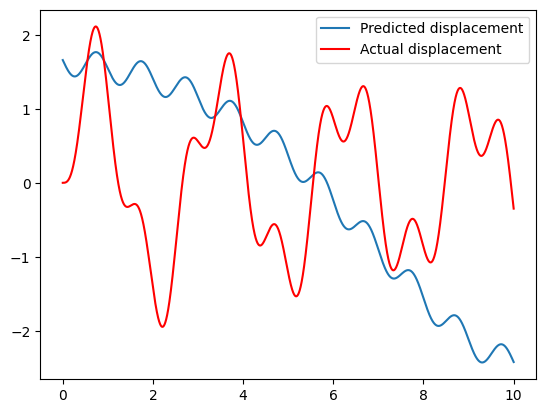

In [12]:
plt.plot(t_train,np.mean(x_pred,axis=(0, 2)),label='Predicted displacement')
plt.plot(t_train,x_train,'r',label='Actual displacement')
plt.legend()

In [ ]:
# sio.savemat("G:/My Drive/Python_codes/sdof0.mat", {"x_pred":x_pred, "k":samples[7].flatten(),"c":samples[6].flatten()})

In [31]:
data_to_save = {
   "x_pred":x_pred, "c":samples[6].flatten(),"k":samples[7].flatten()
}
file_name = 'output.mat'
sio.savemat(file_name, data_to_save)